In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

plt.style.use('ggplot')
%matplotlib inline
pd.set_option('display.max_columns',None)

In [40]:
df = pd.read_csv('winequality-red.csv')

In [41]:
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [42]:
df.shape

(1599, 12)

In [43]:
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

In [44]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [45]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [46]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [47]:
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [ ]:
na_features = [features for features in df.columns if df[features].isnull().sum() > 0]
for features in na_features:
    print(features,':',df[features].isnull().mean()*100,'% missing value')

In [49]:
def categorize_variables(df):
    
    categorical = []
    discrete = []
    continuous = []
    datetime = []
    
    for column in df.columns:
        
#         if pd.api.types.is_datetime64_any_dtype(df[column]):
#             datetime.append(column)
            
        if pd.api.types.is_numeric_dtype(df[column]):
            
            if len(df[column].unique()) / len(df) < 0.05:
                discrete.append(column)
                
            else:
                continuous.append(column)
                
        elif pd.api.types.is_object_dtype(df[column]):
            categorical.append(column)
            
        else:
            categorical.append(column)
    
    return categorical, discrete, continuous, datetime

In [50]:
categorical,discrete,continuous,datetime = categorize_variables(df)
numeric = discrete + continuous

print("Categorical: ", categorical)
print("Discrete: ", discrete)
print("Continuous: ", continuous)
print("Numeric: ", numeric)

Categorical:  []
Discrete:  ['free sulfur dioxide', 'alcohol', 'quality']
Continuous:  ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'total sulfur dioxide', 'density', 'pH', 'sulphates']
Numeric:  ['free sulfur dioxide', 'alcohol', 'quality', 'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'total sulfur dioxide', 'density', 'pH', 'sulphates']


In [ ]:
for feature in numeric:
    data = df.copy()
    
    plt.figure(figsize=(10, 4))
    
    plt.subplot(1, 2, 1)  
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(feature + ' Histogram')
    
    plt.subplot(1, 2, 2) 
    stats.probplot(data[feature], dist="norm", plot=plt)
    plt.title(feature + ' QQ Plot')

    plt.show()

# plt.figure(figsize=(15, 15))
# for i, feature in enumerate(numeric):
#     plt.subplot(len(numeric), 1, i+1)
#     sns.histplot(data[feature], kde=True)
#     plt.title(feature)
# plt.tight_layout()
# plt.show()

In [52]:
## Left-Skewed: Log Transformation

In [53]:
#for feature in discrete:
#    data = df.copy()
#    data.groupby(feature)['Quality'].count().plot.bar()
#    plt.xlabel(feature)
#   plt.ylabel('Quality')
#    plt.title(feature)
#    plt.show()

In [54]:
#for columns in categorical:    
#   sns.countplot(x = columns, data=df)
#    sns.histplot(data=df, x=columns, hue=df['Survived'], multiple='stack')
#    plt.title(columns)
#    plt.show()

<Axes: >

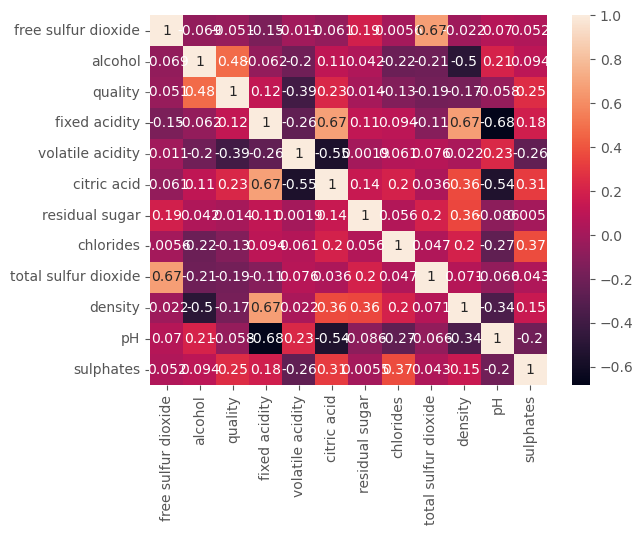

In [55]:
sns.heatmap(df[numeric].corr(), annot = True)

/Users/devambani/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


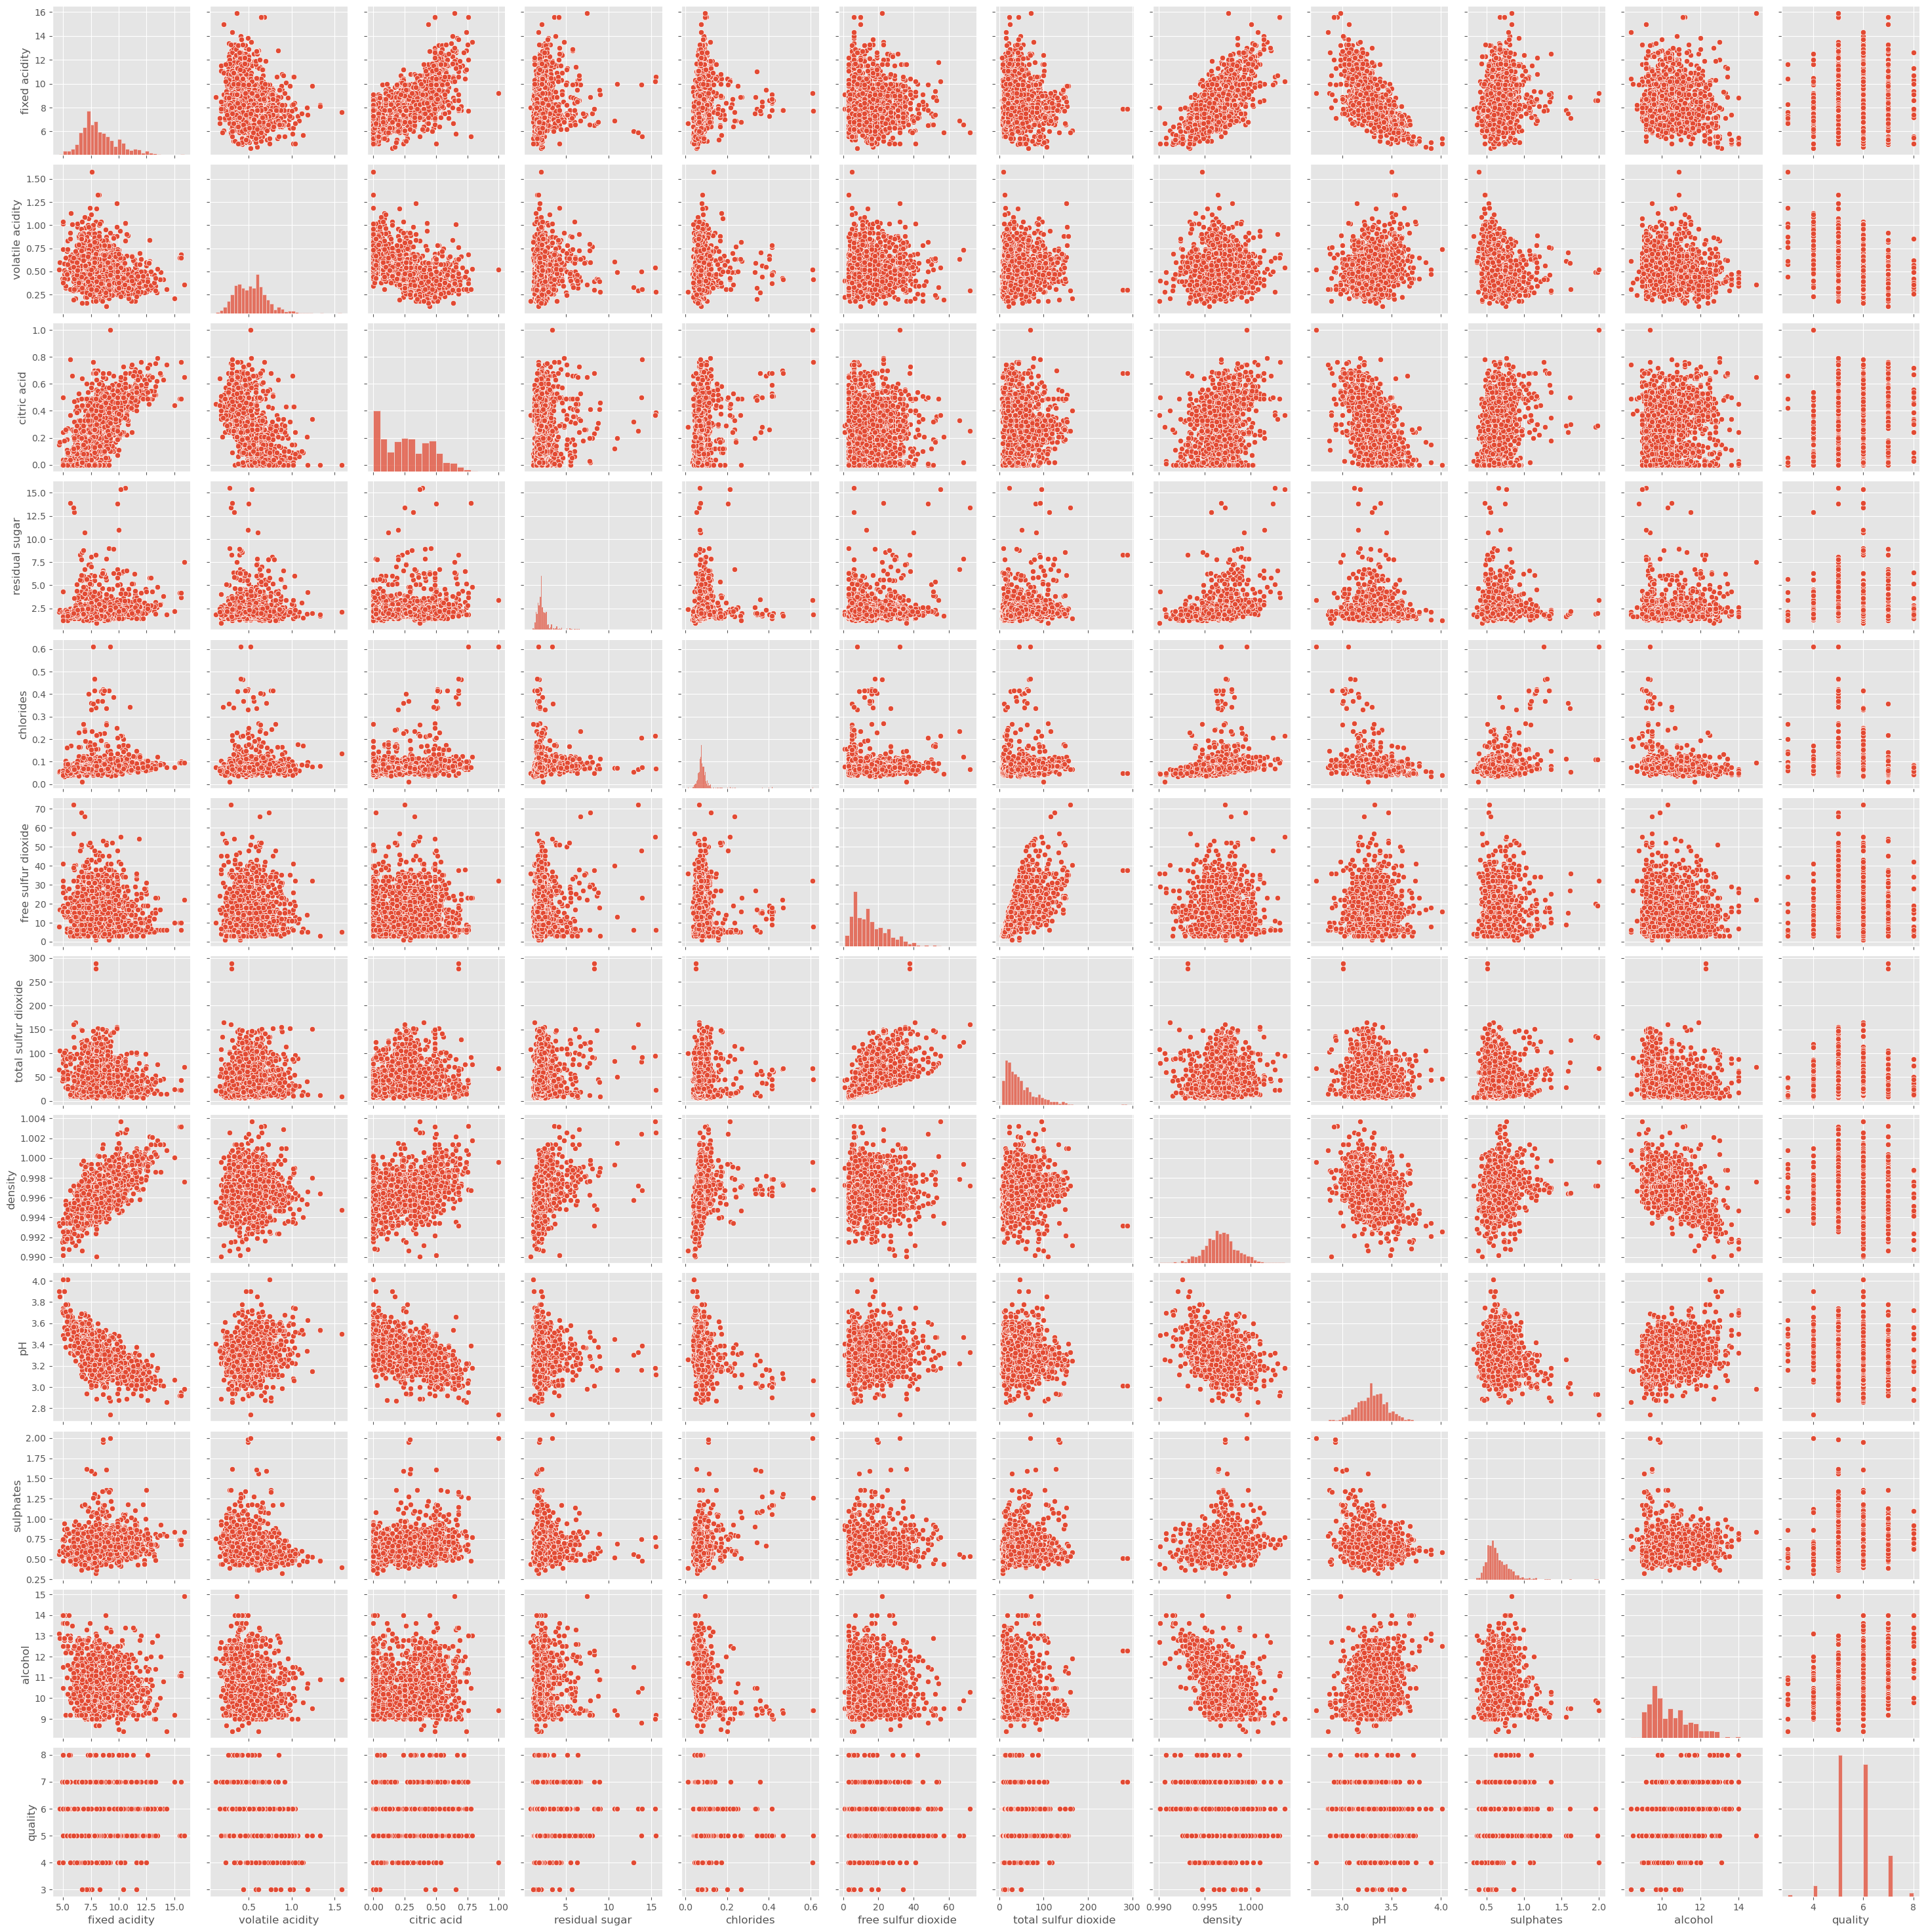

In [56]:
sns.pairplot(df)

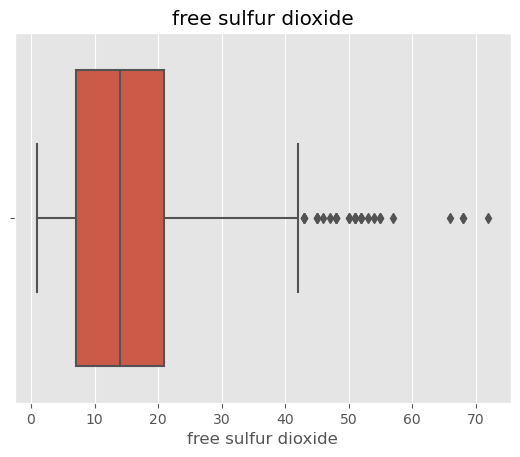

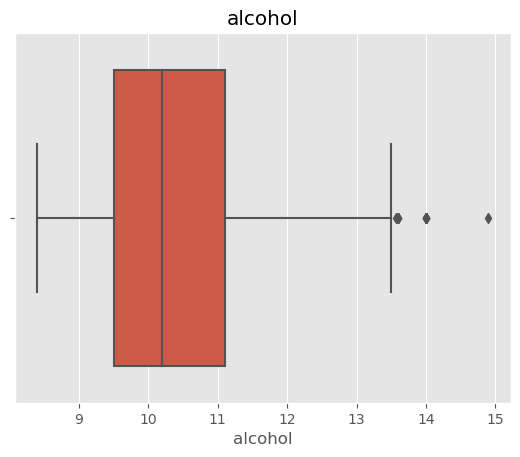

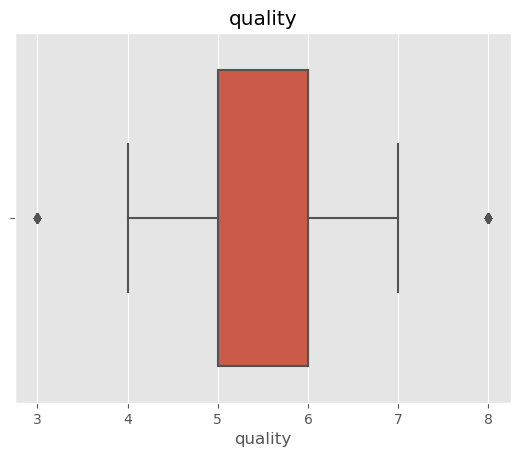

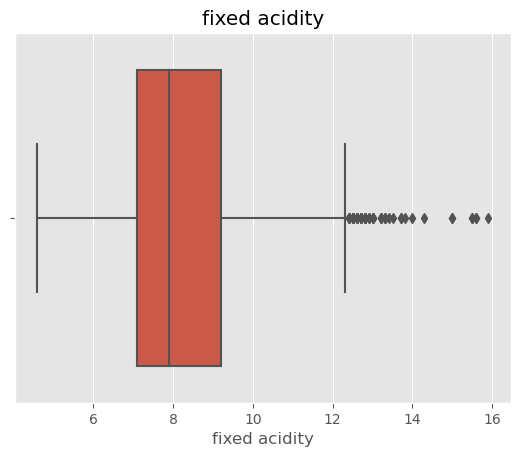

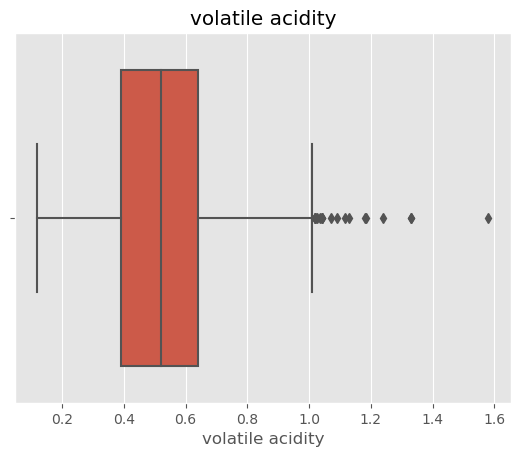

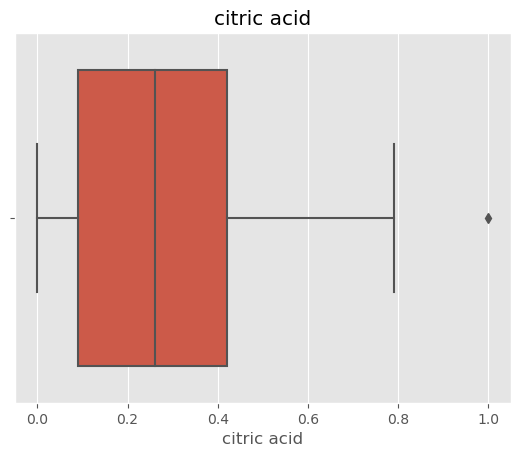

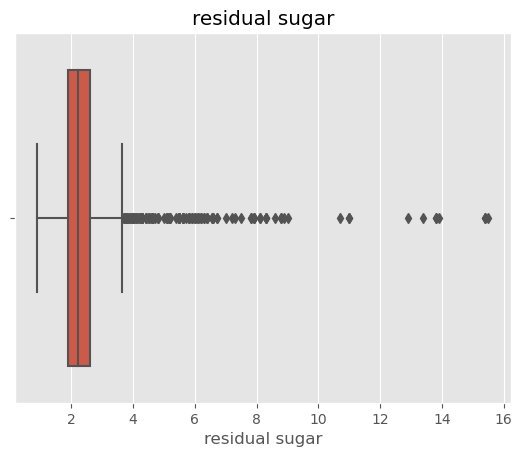

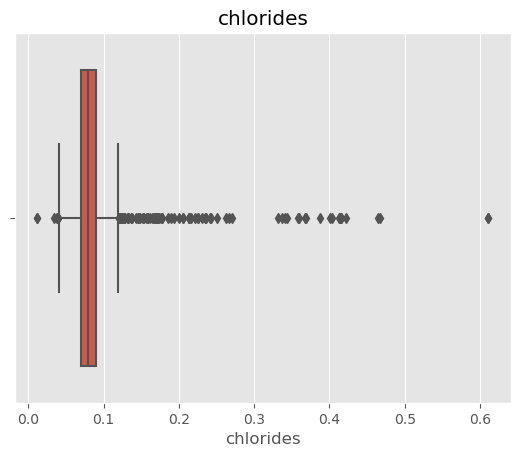

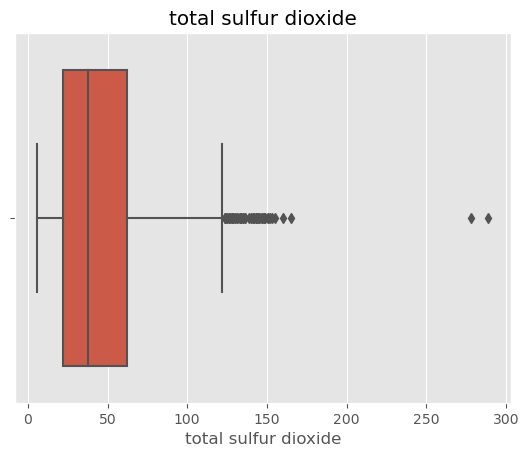

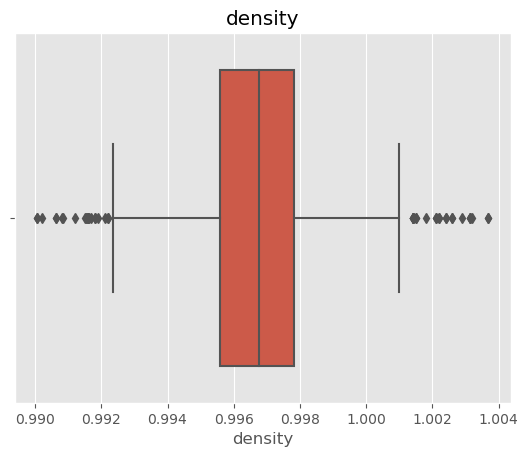

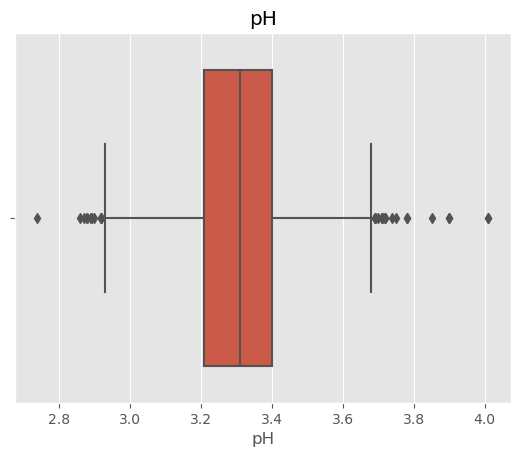

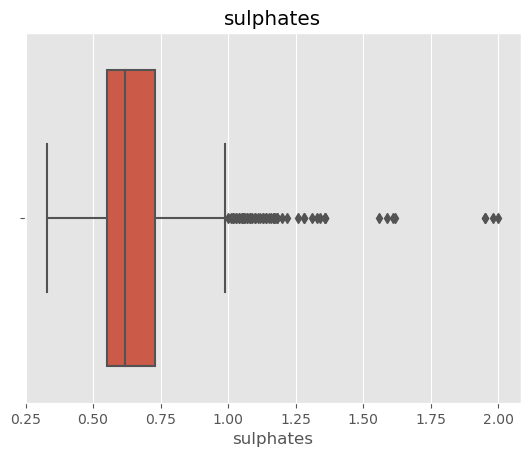

In [57]:
for features in numeric:
    sns.boxplot(x = df[features])
    plt.title(features)
    plt.show()

In [58]:
from sklearn.model_selection import train_test_split

x = df.drop('quality', axis = 1)
y = y = df['quality']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state= 42)


In [59]:
x_train.head()
# x_train.shape
y_train.shape

(1279,)

In [60]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

trf1 = SimpleImputer(strategy='mean')  

In [61]:
from sklearn.preprocessing import MinMaxScaler

trf2 = MinMaxScaler()

In [62]:
from sklearn.base import BaseEstimator, TransformerMixin

class Outlier(BaseEstimator, TransformerMixin):
    def __init__(self, factor=1.5):
        self.factor = factor

    def fit(self, X, y=None):
        self.lower_bound_ = np.percentile(X, 25) - self.factor * (np.percentile(X, 75) - np.percentile(X, 25))
        self.upper_bound_ = np.percentile(X, 75) + self.factor * (np.percentile(X, 75) - np.percentile(X, 25))
        return self

    def transform(self, X, y=None):
        X_clipped = np.clip(X, self.lower_bound_, self.upper_bound_)
        return X_clipped

In [63]:
from sklearn.preprocessing import OneHotEncoder

onehot = OneHotEncoder(handle_unknown='ignore')

In [64]:
from sklearn.preprocessing import FunctionTransformer

def log_transform(x):
    return np.log1p(x) 

trf5 = FunctionTransformer(log_transform)

In [65]:
numeric_standardized = ['fixed acidity','volatile acidity','citric acid','free sulfur dioxide','pH','sulphates','alcohol','density']  # Columns to be standardized
# categorical_features_onehot = ['Sex','Embarked','Pclass']  # Columns for one-hot encoding
# categorical_features_ordinal = ['Pclass']  # Columns for ordinal encoding
skewed_features = ['residual sugar','chlorides','total sulfur dioxide']  # Columns to apply log transform

In [66]:
from sklearn.pipeline import Pipeline

preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([('imputer', trf1), ('scaler', trf2), ('capper', Outlier())]), numeric_standardized),
        #('cat_onehot', onehot, categorical_features_onehot),
        ('log_transform', trf5, skewed_features)
    ],
    remainder='passthrough',
    sparse_threshold=0.0
)

In [67]:
x_train.shape
y_train.shape

(1279,)

In [68]:
from sklearn.linear_model import LinearRegression

# Create the pipeline by combining the preprocessor with a model
pipeline1 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

# Fit the pipeline to your training data
pipeline1.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   sparse_threshold=0.0,
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler()),
                                                                  ('capper',
                                                                   Outlier())]),
                                                  ['fixed acidity',
                                                   'volatile acidity',
                                                   'citric acid',
                                                   'free sulfur dioxide', 'pH',
                                                   'sulphates', 'alcohol',
                                                   'density']),
                                                 ('log_transform',
                                                  FunctionTransformer(func=<function log_transform at 0x29f8fbe20>),
                                                  ['residual sugar',
                                                   'chlorides',
                                                   'total sulfur dioxide'])])),
                ('model', LinearRegression())])

In [69]:
# import pickle

# # Save the model to a file
# with open('model1_pipeline.pkl', 'wb') as file:
#     pickle.dump(pipeline1, file)

In [70]:
# # Load the model from a file
# with open('model1_pipeline.pkl', 'rb') as file:
#     loaded_pipeline = pickle.load(file)

In [71]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Predict on the test set
y_pred = pipeline1.predict(x_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r_square = r2_score(y_test, y_pred)

# Print metrics
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R^2): {r_square}')

Mean Squared Error (MSE): 0.3905454038955791
Root Mean Squared Error (RMSE): 0.6249363198723363
Mean Absolute Error (MAE): 0.5045161323887992
R-squared (R^2): 0.40238423528583367


/Users/devambani/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [72]:
from sklearn.ensemble import RandomForestRegressor

pipeline2 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor())
])

# Fit the pipeline to your training data
pipeline2.fit(x_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   sparse_threshold=0.0,
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler()),
                                                                  ('capper',
                                                                   Outlier())]),
                                                  ['fixed acidity',
                                                   'volatile acidity',
                                                   'citric acid',
                                                   'free sulfur dioxide', 'pH',
                                                   'sulphates', 'alcohol',
                                                   'density']),
                                                 ('log_transform',
                                                  FunctionTransformer(func=<function log_transform at 0x29f8fbe20>),
                                                  ['residual sugar',
                                                   'chlorides',
                                                   'total sulfur dioxide'])])),
                ('model', RandomForestRegressor())])

In [73]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Predict on the test set
y_pred = pipeline2.predict(x_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r_square = r2_score(y_test, y_pred)


# Print metrics
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R^2): {r_square}')

Mean Squared Error (MSE): 0.31623
Root Mean Squared Error (RMSE): 0.5623433115099707
Mean Absolute Error (MAE): 0.43162500000000004
R-squared (R^2): 0.5161022728970845


/Users/devambani/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [74]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(pipeline2, x_train, y_train, cv=5, scoring='neg_mean_squared_error')
mean_sse = -scores.mean() 

print(f"Mean Squared Error: {mean_sse}")

Mean Squared Error: 0.36593018382352943


In [75]:
params = {
    'model__max_depth': [1, 2, 3, 4, 5, None],
    'model__n_estimators': [100, 200, 300],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4],
    'model__max_features': ['auto', 'sqrt']
}

In [76]:
from sklearn.model_selection import GridSearchCV

# Make sure to change the scoring to 'neg_mean_squared_error'
grid = GridSearchCV(pipeline2, params, cv=5, scoring='neg_mean_squared_error')
grid.fit(x_train, y_train)

best_sse_score = -grid.best_score_  # Convert back to positive value for mean squared error
best_params = grid.best_params_

print(f"Best Mean Squared Error from Grid Search: {best_sse_score}")
print(f"Best Parameters: {best_params}")

/Users/devambani/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:542: FitFailedWarning: 
810 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
810 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/devambani/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/devambani/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1351, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/devambani/anaconda3/lib/python3.11/site-packages/sklearn/pipe

Best Mean Squared Error from Grid Search: 0.36026039177389707
Best Parameters: {'model__max_depth': None, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 1, 'model__min_samples_split': 2, 'model__n_estimators': 200}


In [77]:
# Set the best parameters to the pipeline
pipeline2.set_params(**best_params)

# Fit the pipeline with the entire training data
pipeline2.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   sparse_threshold=0.0,
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler()),
                                                                  ('capper',
                                                                   Outlier())]),
                                                  ['fixed acidity',
                                                   'volatile acidity',
                                                   'citric acid',
                                                   'free sulfur dioxide', 'pH',
                                                   'sulphates', 'alcohol',
                                                   'density']),
                                                 ('log_transform',
                                                  FunctionTransformer(func=<function log_transform at 0x29f8fbe20>),
                                                  ['residual sugar',
                                                   'chlorides',
                                                   'total sulfur dioxide'])])),
                ('model',
                 RandomForestRegressor(max_features='sqrt', n_estimators=200))])

In [78]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Predict on the test set
y_pred = pipeline2.predict(x_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r_square = r2_score(y_test, y_pred)

# Print metrics
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R^2): {r_square}')

Mean Squared Error (MSE): 0.29301976562500004
Root Mean Squared Error (RMSE): 0.5413130015296141
Mean Absolute Error (MAE): 0.415203125
R-squared (R^2): 0.5516187629821128


/Users/devambani/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [79]:
from sklearn.linear_model import Lasso

pipeline3 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', Lasso())
])

# Fit the pipeline to your training data
pipeline3.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   sparse_threshold=0.0,
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler()),
                                                                  ('capper',
                                                                   Outlier())]),
                                                  ['fixed acidity',
                                                   'volatile acidity',
                                                   'citric acid',
                                                   'free sulfur dioxide', 'pH',
                                                   'sulphates', 'alcohol',
                                                   'density']),
                                                 ('log_transform',
                                                  FunctionTransformer(func=<function log_transform at 0x29f8fbe20>),
                                                  ['residual sugar',
                                                   'chlorides',
                                                   'total sulfur dioxide'])])),
                ('model', Lasso())])

In [80]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Predict on the test set
y_pred = pipeline3.predict(x_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r_square = r2_score(y_test, y_pred)

# Print metrics
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R^2): {r_square}')

Mean Squared Error (MSE): 0.6571600689645265
Root Mean Squared Error (RMSE): 0.81065409945582
Mean Absolute Error (MAE): 0.6852839132134478
R-squared (R^2): -0.005591701339940913


/Users/devambani/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [81]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(pipeline3, x_train, y_train, cv=5, scoring='neg_mean_squared_error')
mean_sse = -scores.mean() 

print(f"Mean Squared Error: {mean_sse}")

Mean Squared Error: 0.6525463508065571


In [82]:
params = {
    'model__alpha': [0.001, 0.01, 0.1, 1, 10, 100]
}

In [83]:
# Set up the grid search with Lasso pipeline and parameter grid
grid = GridSearchCV(pipeline3, params, cv=5, scoring='neg_mean_squared_error')

# Fit the grid search to the training data
grid.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          sparse_threshold=0.0,
                                                          transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          MinMaxScaler()),
                                                                                         ('capper',
                                                                                          Outlier())]),
                                                                         ['fixed '
                                                                          'acidity',
                                                                          'volatile '
                                                                          'acidity',
                                                                          'citric '
                                                                          'acid',
                                                                          'free '
                                                                          'sulfur '
                                                                          'dioxide',
                                                                          'pH',
                                                                          'sulphates',
                                                                          'alcohol',
                                                                          'density']),
                                                                        ('log_transform',
                                                                         FunctionTransformer(func=<function log_transform at 0x29f8fbe20>),
                                                                         ['residual '
                                                                          'sugar',
                                                                          'chlorides',
                                                                          'total '
                                                                          'sulfur '
                                                                          'dioxide'])])),
                                       ('model', Lasso())]),
             param_grid={'model__alpha': [0.001, 0.01, 0.1, 1, 10, 100]},
             scoring='neg_mean_squared_error')

In [84]:
from sklearn.model_selection import GridSearchCV

# Make sure to change the scoring to 'neg_mean_squared_error'
grid = GridSearchCV(pipeline3, params, cv=5, scoring='neg_mean_squared_error')
grid.fit(x_train, y_train)

best_sse_score = -grid.best_score_  # Convert back to positive value for mean squared error
best_params = grid.best_params_

print(f"Best Mean Squared Error from Grid Search: {best_sse_score}")
print(f"Best Parameters: {best_params}")

Best Mean Squared Error from Grid Search: 0.44026327998121595
Best Parameters: {'model__alpha': 0.001}


In [85]:
# Set the best parameters to the pipeline
pipeline3.set_params(**best_params)

# Fit the pipeline with the entire training data
pipeline3.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   sparse_threshold=0.0,
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler()),
                                                                  ('capper',
                                                                   Outlier())]),
                                                  ['fixed acidity',
                                                   'volatile acidity',
                                                   'citric acid',
                                                   'free sulfur dioxide', 'pH',
                                                   'sulphates', 'alcohol',
                                                   'density']),
                                                 ('log_transform',
                                                  FunctionTransformer(func=<function log_transform at 0x29f8fbe20>),
                                                  ['residual sugar',
                                                   'chlorides',
                                                   'total sulfur dioxide'])])),
                ('model', Lasso(alpha=0.001))])

In [86]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Predict on the test set
y_pred = pipeline3.predict(x_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r_square = r2_score(y_test, y_pred)

# Print metrics
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R^2): {r_square}')

Mean Squared Error (MSE): 0.39479836657663886
Root Mean Squared Error (RMSE): 0.6283298230838951
Mean Absolute Error (MAE): 0.5091756450869049
R-squared (R^2): 0.39587631707814197


/Users/devambani/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [87]:
from sklearn.ensemble import GradientBoostingRegressor

pipeline4 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', GradientBoostingRegressor())
])

# Fit the pipeline to your training data
pipeline4.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   sparse_threshold=0.0,
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler()),
                                                                  ('capper',
                                                                   Outlier())]),
                                                  ['fixed acidity',
                                                   'volatile acidity',
                                                   'citric acid',
                                                   'free sulfur dioxide', 'pH',
                                                   'sulphates', 'alcohol',
                                                   'density']),
                                                 ('log_transform',
                                                  FunctionTransformer(func=<function log_transform at 0x29f8fbe20>),
                                                  ['residual sugar',
                                                   'chlorides',
                                                   'total sulfur dioxide'])])),
                ('model', GradientBoostingRegressor())])

In [88]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Predict on the test set
y_pred = pipeline4.predict(x_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r_square = r2_score(y_test, y_pred)

# Print metrics
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R^2): {r_square}')

Mean Squared Error (MSE): 0.35791893691813104
Root Mean Squared Error (RMSE): 0.598263267231184
Mean Absolute Error (MAE): 0.48036317627029346
R-squared (R^2): 0.45230952135542046


/Users/devambani/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [89]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(pipeline4, x_train, y_train, cv=5, scoring='neg_mean_squared_error')
mean_sse = -scores.mean() 

print(f"Mean Squared Error: {mean_sse}")

Mean Squared Error: 0.40754830615417736


In [90]:
params = {
    'model__n_estimators': [100, 200, 300],  # Number of boosting stages to be run
    'model__learning_rate': [0.01, 0.1, 0.2],  # Shrinks the contribution of each tree by learning_rate
    'model__max_depth': [3, 4, 5],  # Maximum depth of the individual regression estimators
    'model__min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'model__min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'model__max_features': ['auto', 'sqrt', 'log2'],  # The number of features to consider when looking for the best split
}

In [93]:
# Set up the grid search with GradientBoosting pipeline and parameter grid
grid = GridSearchCV(pipeline4, params, cv=2, scoring='neg_mean_squared_error')

# Fit the grid search to the training data
grid.fit(x_train, y_train)

/Users/devambani/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:542: FitFailedWarning: 
486 fits failed out of a total of 1458.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
486 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/devambani/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/devambani/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1351, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/devambani/anaconda3/lib/python3.11/site-packages/sklearn/pipe

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          sparse_threshold=0.0,
                                                          transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          MinMaxScaler()),
                                                                                         ('capper',
                                                                                          Outlier())]),
                                                                         ['fixed '
                                                                          'acidity',
                                                                          'volatile '
                                                                          'acidity',
                                                                          'citric '
                                                                          'acid',
                                                                          'free '
                                                                          'sulfur '
                                                                          'dioxide',
                                                                          'pH',
                                                                          'sulphates',
                                                                          'alcohol',
                                                                          'density'...
                                                                          'sugar',
                                                                          'chlorides',
                                                                          'total '
                                                                          'sulfur '
                                                                          'dioxide'])])),
                                       ('model', GradientBoostingRegressor())]),
             param_grid={'model__learning_rate': [0.01, 0.1, 0.2],
                         'model__max_depth': [3, 4, 5],
                         'model__max_features': ['auto', 'sqrt', 'log2'],
                         'model__min_samples_leaf': [1, 2, 4],
                         'model__min_samples_split': [2, 5, 10],
                         'model__n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error')

In [94]:
# Set the best parameters to the pipeline
pipeline4.set_params(**best_params)

# Fit the pipeline with the entire training data
pipeline4.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   sparse_threshold=0.0,
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler()),
                                                                  ('capper',
                                                                   Outlier())]),
                                                  ['fixed acidity',
                                                   'volatile acidity',
                                                   'citric acid',
                                                   'free sulfur dioxide', 'pH',
                                                   'sulphates', 'alcohol',
                                                   'density']),
                                                 ('log_transform',
                                                  FunctionTransformer(func=<function log_transform at 0x29f8fbe20>),
                                                  ['residual sugar',
                                                   'chlorides',
                                                   'total sulfur dioxide'])])),
                ('model', GradientBoostingRegressor(alpha=0.001))])

In [95]:
# Predict on the test set
y_pred = pipeline4.predict(x_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r_square = r2_score(y_test, y_pred)

# Print metrics
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R^2): {r_square}')

Mean Squared Error (MSE): 0.3579242001253228
Root Mean Squared Error (RMSE): 0.5982676659533948
Mean Absolute Error (MAE): 0.4806314078344641
R-squared (R^2): 0.45230146755281686


/Users/devambani/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
